# 📖 Academic Explanation of Validation Curves (Section 3.5.1)

# https://www.ijcai.org/Proceedings/95-2/Papers/016.pdf


---

## 1. Definition and Purpose

A **validation curve** is a diagnostic tool in machine learning used to evaluate how the performance of a learning algorithm changes with respect to variations in a specific **hyperparameter**.  

- **Validation curves vs. Learning curves**:  
  - Learning curves study performance as a function of training set size.  
  - Validation curves study performance as a function of **one hyperparameter**.  

**Purpose**:  
- Diagnose **underfitting vs. overfitting**.  
- Visualize the **bias–variance trade-off**.  
- Identify the **hyperparameter range** that yields the best generalization.  

---

## 2. Methodological Framework

- Model: $h_{\theta}$ with hyperparameter $\lambda$.  
- Parameter range:  

$$
\Lambda = \{\lambda_1, \lambda_2, \dots, \lambda_m\}.
$$  

For each $\lambda \in \Lambda$:  
1. Train on $D_{\text{train}}$.  
2. Evaluate on validation folds $D_{\text{val}}$ using cross-validation.  
3. Aggregate metrics to compute **training score** and **validation score**.  

Result:  
- **Training curve**: model fit to training data.  
- **Validation curve**: model generalization ability.  

---

## 3. Mathematical Representation

- **Training accuracy (or metric):**

$$
S_{\text{train}}(\lambda) = \frac{1}{n_{\text{train}}}
\sum_{i=1}^{n_{\text{train}}}
\mathbf{1}\big(h_{\lambda}(x_i) = y_i\big)
$$

- **Validation accuracy (via K-fold CV):**

$$
S_{\text{val}}(\lambda) = \frac{1}{K} \sum_{k=1}^{K}
\Bigg( \frac{1}{|D_{\text{val}}^{(k)}|}
\sum_{(x_j,y_j) \in D_{\text{val}}^{(k)}}
\mathbf{1}\big(h_{\lambda}(x_j) = y_j\big) \Bigg)
$$

where $K$ = number of folds.

---

## 4. Interpretation of Curves

- **Underfitting region (high bias):**  
  Both training and validation scores are **low** → model too simple.  

- **Overfitting region (high variance):**  
  Training score is **high**, validation score **decreases** → model too complex.  

- **Optimal region:**  
  Validation curve **peaks** → balance between bias and variance, best generalization.  

---

## 5. Academic Significance

- **Bias–Variance Trade-off:** Validation curves visualize the fundamental trade-off in statistical learning theory.  
- **Model Selection:** Empirical guidance for hyperparameter tuning beyond brute-force search.  
- **Research Value:**  
  - Vapnik’s SVM theory.  
  - Hastie et al., *Elements of Statistical Learning* (2009).  

---

## ✅ Summary

Validation curves provide a principled framework to **empirically study the relationship** between hyperparameter choices and model generalization.  

They bridge **theory** (bias–variance trade-off, model complexity) with **practice** (hyperparameter tuning and selection).


# 📐 Mathematical & Statistical Foundations of Validation Curves

---

## 1. Model Training and Hypothesis Function

Given training data:

$$
D = \{(x_i, y_i)\}_{i=1}^n, \quad x_i \in \mathbb{R}^d, \, y_i \in \mathcal{Y}
$$

A hypothesis (model) is parameterized by **learnable parameters** $\theta$ and a **hyperparameter** $\lambda$:

$$
h_{\theta,\lambda}(x): \mathbb{R}^d \to \mathcal{Y}
$$

---

## 2. Loss Function (Empirical Risk)

- **Classification loss**:

$$
L(y, \hat{y}) = \mathbf{1}(y \neq \hat{y})
$$

- **Regression loss**:

$$
L(y, \hat{y}) = (y - \hat{y})^2
$$

- **Empirical risk (training error):**

$$
R_{\text{emp}}(\lambda) = \frac{1}{n} \sum_{i=1}^n L \big( y_i, h_{\theta,\lambda}(x_i) \big)
$$

---

## 3. Cross-Validation Score

In $K$-fold cross-validation, data is partitioned into $K$ folds:

$$
S_{\text{val}}(\lambda) = \frac{1}{K} \sum_{k=1}^K
\left( \frac{1}{|D_{\text{val}}^{(k)}|}
\sum_{(x_j,y_j)\in D_{\text{val}}^{(k)}}
\mathbf{1}\big(y_j = h_{\theta,\lambda}(x_j)\big) \right)
$$

This defines the **validation curve score** for hyperparameter $\lambda$.

---

## 4. Bias–Variance Decomposition

Validation curves reveal the trade-off between underfitting and overfitting:

$$
\mathbb{E}\big[(y - \hat{f}(x))^2\big]
= \underbrace{\big(\text{Bias}[\hat{f}(x)]\big)^2}_{\text{underfitting}}
+ \underbrace{\text{Var}[\hat{f}(x)]}_{\text{overfitting}}
+ \sigma^2
$$

---

## 5. Metrics Commonly Plotted in Validation Curves

- **Accuracy**:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision**:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity)**:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-score**:

$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}
{\text{Precision} + \text{Recall}}
$$

---

## 6. Learning Complexity Functions

Validation curves are especially tied to **regularization hyperparameters**:

- **Ridge / L2 regularization**:

$$
J(\theta,\lambda) = \frac{1}{n} \sum_{i=1}^n
L\big(y_i, h_\theta(x_i)\big) + \lambda \|\theta\|_2^2
$$

- **Lasso / L1 regularization**:

$$
J(\theta,\lambda) = \frac{1}{n} \sum_{i=1}^n
L\big(y_i, h_\theta(x_i)\big) + \lambda \|\theta\|_1
$$

These terms directly control model complexity and shape the validation curve.

---

## 7. Statistical Confidence Intervals

To assess robustness of validation curve estimates:

$$
CI(\lambda) = S_{\text{val}}(\lambda) \, \pm \, z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{K}}
$$

where $z_{\alpha/2}$ is the critical value from the normal distribution.

---

## ✅ Summary

Validation curves are grounded in:

- **Empirical risk minimization** (training error).  
- **Cross-validation scoring** (generalization).  
- **Bias–variance decomposition** (under/overfitting).  
- **Performance metrics** (Accuracy, Precision, Recall, F1).  
- **Regularization penalties** (L1/L2).  
- **Confidence intervals** for statistical reliability.  

They form a **principled framework** for diagnosing model complexity and guiding hyperparameter tuning.


# 📚 Key Academic Works on Validation Curves, Hyperparameter Tuning, and Bias–Variance Analysis

---

## 🔹 Theoretical Foundations

- **Kohavi, R. (1995).**  
  *A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection.* IJCAI.  
  ➝ Early systematic evaluation of validation techniques; showed how cross-validation prevents overfitting in hyperparameter tuning.  

- **Bengio, Y. (2000).**  
  *Gradient-Based Optimization of Hyperparameters.* Neural Computation, 12(8):1889–1900.  
  ➝ Formalized hyperparameter optimization using gradients; emphasized separation of training, validation, and test sets for bias–variance control.  

- **Hastie, T., Tibshirani, R., & Friedman, J. (2009).**  
  *The Elements of Statistical Learning.* Springer.  
  ➝ Canonical text; Chapters 7 & 9 detail validation and learning curves as tools to diagnose underfitting vs. overfitting.  

---

## 🔹 Hyperparameter Search Advances

- **Bergstra, J., & Bengio, Y. (2012).**  
  *Random Search for Hyper-Parameter Optimization.* JMLR, 13.  
  ➝ Demonstrated that random search with validation-based evaluation often outperforms grid search.  

- **Snoek, J., Larochelle, H., & Adams, R. P. (2012).**  
  *Practical Bayesian Optimization of Machine Learning Algorithms.* NeurIPS.  
  ➝ Introduced Bayesian optimization; validation curves are central to evaluating sampled configurations.  

- **Hutter, F., Kotthoff, L., & Vanschoren, J. (Eds.) (2019).**  
  *Automated Machine Learning: Methods, Systems, Challenges.* Springer.  
  ➝ Discusses how AutoML frameworks rely on validation curves as diagnostic and optimization signals.  

---

## 🔹 SVM-Specific Evidence

- **Chapelle, O., Vapnik, V., Bousquet, O., & Mukherjee, S. (2002).**  
  *Choosing Multiple Parameters for Support Vector Machines.* Machine Learning, 46(1):131–159.  
  ➝ Seminal work on SVM hyperparameters (\(C, \gamma\)); empirically showed validation curves detect overfitting when \(\gamma\) is too large.  

---

## 🔹 Statistical Reliability

- **Dietterich, T. G. (1998).**  
  *Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithms.* Neural Computation, 10(7):1895–1923.  
  ➝ Introduced statistical testing methods to ensure reliability in comparing hyperparameter settings.  

---

## 🔹 Generalization & Bias–Variance Trade-off

- **Domingos, P. (2012).**  
  *A Few Useful Things to Know About Machine Learning.* CACM, 55(10):78–87.  
  ➝ Widely cited conceptual overview; emphasizes validation-based model assessment to avoid under/overfitting.  

- **Goodfellow, I., Bengio, Y., & Courville, A. (2016).**  
  *Deep Learning.* MIT Press.  
  ➝ Chapter 5 (ML basics) & Chapter 7 (Regularization) show how validation curves reveal generalization gaps.  

---

## 🧩 Why These Works Matter

- **Theoretical Foundations** → Kohavi (1995), Bengio (2000), Hastie et al. (2009).  
- **SVM Evidence** → Chapelle et al. (2002).  
- **Hyperparameter Search Advances** → Bergstra & Bengio (2012), Snoek et al. (2012).  
- **Generalization & Bias–Variance** → Domingos (2012), Goodfellow et al. (2016).  
- **Modern Frameworks** → Hutter et al. (2019).  

✅ **Together, these works establish validation curves as indispensable for diagnosing bias–variance trade-offs, tuning hyperparameters (like \(\gamma\)), and ensuring robust generalization in both classical ML and deep learning.**


In [2]:
# ----------------------------------------
# Validation Curve Example in Scikit-learn
# ----------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# 1. Load dataset
X, y = load_digits(return_X_y=True)

# 2. Define model and parameter range
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X, y,
    param_name="gamma",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# 3. Compute means and std deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

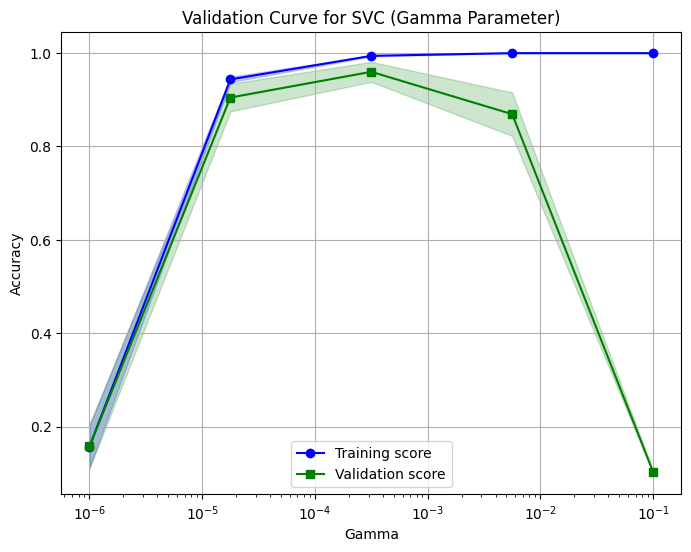

In [3]:
# 4. Plot Validation Curve
plt.figure(figsize=(8, 6))
plt.semilogx(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.semilogx(param_range, test_mean, label="Validation score", color="green", marker="s")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Validation Curve for SVC (Gamma Parameter)")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# 📊 Interpretation of Validation Curves for SVC (Gamma Parameter)

The presented validation curves illustrate the relationship between the **SVC gamma hyperparameter** ($\gamma$) and model performance, measured through **training accuracy** and **validation accuracy**.

---

## 🔹 Low Gamma Region ($\gamma \leq 10^{-6}$)

- Both training and validation scores are **very low**, indicating underfitting.  
- The kernel function’s effective width is too broad, producing **overly smooth decision boundaries** that fail to capture data complexity.  
- **Implication**: High bias, low variance.  

---

## 🔹 Intermediate Gamma Region ($\gamma \in [10^{-4}, 10^{-3}]$)

- Training and validation accuracies **increase sharply** and stabilize near their peak.  
- Validation scores closely track training scores $\;\Rightarrow\;$ the model captures the **essential structure** of the data without overfitting.  
- **Implication**: Optimal **bias–variance trade-off**, best generalization.  

---

## 🔹 High Gamma Region ($\gamma \geq 10^{-2}$)

- Training accuracy remains **very high** ($\approx 1.0$), but validation accuracy **drops**.  
- The decision boundary becomes **too sensitive** to individual points, producing overfitting.  
- **Implication**: Low bias, high variance $\;\Rightarrow\;$ poor generalization.  

---

## 🎓 Academic Insights

- **Bias–Variance Trade-off**: Validation curves empirically show the transition from **underfitting** (low $\gamma$) $\;\to\;$ **optimal** (intermediate $\gamma$) $\;\to\;$ **overfitting** (high $\gamma$).  
- **Diagnostic Utility**: Divergence between training and validation accuracies $\;=\;$ **overfitting**; convergence at low values $\;=\;$ **underfitting**.  
- **Optimal Gamma**: Lies in the **intermediate region**, where validation accuracy peaks with minimal divergence.  
- **Practical Implication**: Validation curves guide **hyperparameter tuning**, helping select values that **maximize generalization performance** rather than just training accuracy.  

---

✅ **In summary**: The validation curves for SVC (gamma parameter) highlight the **bias–variance dynamics**, making them a powerful diagnostic tool for selecting hyperparameters that yield **robust, generalizable models**.
